DNN face detection


* 정확도는 높으나 detection 하는데 느리다.
* 학습에 의한 방식임으로 인식률이 높다.
* 얼굴을 돌리고 있어도 인식 정확도가 높다.


In [ ]:
# 내 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Colab에서 GitHub 에 있는 데이터 가져오기
# caffemodel 다운로드 URL : https://github.com/thegopieffect/computer_vision
# Clone Web URL 를 복사해 옵니다.

!git clone https://github.com/thegopieffect/computer_vision

Cloning into 'computer_vision'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


In [ ]:
# 파일 복사
!cp computer_vision/CAFFE_DNN/deploy.prototxt.txt gdrive/My\ Drive/CV/Face\ Detection/data/
!cp computer_vision/CAFFE_DNN/res10_300x300_ssd_iter_140000.caffemodel gdrive/My\ Drive/CV/Face\ Detection/data/
print('files copy complete!!')

files copy complete!!


In [ ]:
# 다운로드 받았던 파일 제거(선택사항)
!rm -r computer_vision

In [ ]:
# 필요한 패키지와 모듈을 불러옴
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# DNN으로 학습한 모델(caffemodel)을 사용
model_name = "gdrive/My Drive/CV/Face Detection/data/res10_300x300_ssd_iter_140000.caffemodel"
# model Architecture 의 설계도 파일
prototxt_name = "gdrive/My Drive/CV/Face Detection/data/deploy.prototxt.txt"
min_confidence = 0.3  # detection 으로 인정할 최소 확률(신뢰도)
file_name = "gdrive/My Drive/CV/Face Detection/data/image/sports_02.jpg"

In [ ]:
def detectAndDisplay(frame):
    # frame_width 에 맞춰 image resize
    (height, width) = frame.shape[:2]
    ratio = frame_width / width
    dimension = (frame_width, int(height * ratio))
    frame = cv2.resize(frame, dimension, interpolation = cv2.INTER_AREA)
 
    # caffemodel의 weight 값과 모델 네트워크 구성을 불러와서 모델을 정의한다.
    model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

    # 이미지를 300x300 으로 size를 조정하고 blob 를 만든다.
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
            (300, 300), (104.0, 177.0, 123.0))

    # blob을 모델에 넣는다
    model.setInput(blob)
    # detection을 수행한다.
    detections = model.forward()

    # detections 한 수만큼 루프가 돈다.
    for i in range(0, detections.shape[2]):
           
            confidence = detections[0, 0, i, 2]  # confidence 는 detection한 확률을 나타냄

            # min_confidence 보다 큰 경우에만 detection 으로 인정함
            if confidence > min_confidence:
                    # detection 된 영역을 boxing
                    # 상대적 좌표 * np.array([width, height, width, height]) 절대적인 boxing 좌표을 구해낸다 
                    # box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
                    box = detections[0, 0, i, 3:7] * np.array([frame_width, int(height * ratio), frame_width, int(height * ratio)])
                    (startX, startY, endX, endY) = box.astype("int")
                    print(confidence, startX, startY, endX, endY)
     
                    # 얼굴에 bounding box(사각형)를 그리고 확률값도 함께 나타낸다
                    text = "{:.2f}%".format(confidence * 100)
                    y = startY - 10 if startY - 10 > 10 else startY + 10
                    cv2.rectangle(frame, (startX, startY), (endX, endY),
                            (0, 255, 0), 2)
                    cv2.putText(frame, text, (startX, y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # show the output image
    print("#### Face detection(DNN_CAFFE) ####")
    # 이미지를 Display 한다.
    cv2_imshow(frame)

width: 500 pixels
height: 333 pixels
channels: 3
#### Original Image ####


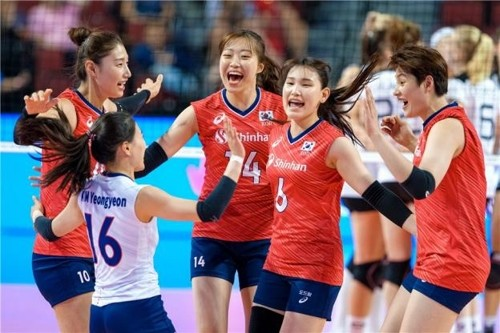

In [ ]:
# detection 하기 전에 원본 이미지를 Display 한다.
img = cv2.imread(file_name)
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]

print("#### Original Image ####")
cv2_imshow(img)

0.99067104 253 56 287 107
0.9770544 87 37 118 89
0.9331567 200 33 232 83
0.7479811 352 60 380 103
#### Face detection(DNN_CAFFE) ####


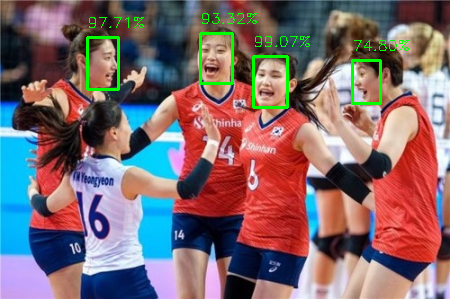

In [ ]:
# 이미지 width size 지정
frame_width = 450

# face detection 하고 display 하는 함수 호출
detectAndDisplay(img)